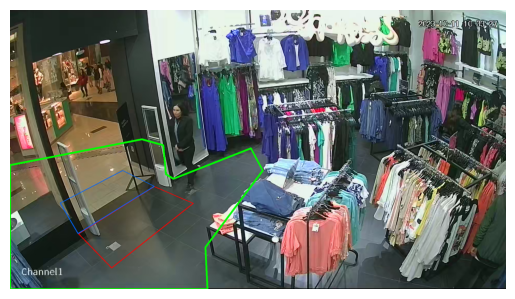

'./frame_with_figure.png'

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the video file and the time point to capture
video_path = 'mini_conce.mp4' # Replace with your video file path
time_stamp = '00:00:15'  # The time stamp where you want to capture the image

# Convert the time stamp to seconds
hours, minutes, seconds = map(int, time_stamp.split(':'))
total_seconds = hours * 3600 + minutes * 60 + seconds

# Function to draw the specified figure on an image
def draw_figure(image):
    # Draw the figure for detection
    polygon_pts=np.array([[0,1080],[0,600],[510,500],[593,523],[603,635],[632,653],[932,535],[978,621],[756,918],[764,1080]], np.int32)
    polygon_pts = polygon_pts.reshape((-1, 1, 2))
    cv2.polylines(image, [polygon_pts], isClosed=True, color=(0, 255, 0), thickness=5)

    #Entrada RED
    pts = np.array([[265, 866],[558, 683],[709, 748],[393, 998]], np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], isClosed=True, color=(0, 0, 255), thickness=2)

    #Salida BLUE
    pts = np.array([[194, 747],[436, 621],[558, 682],[263, 865]], np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], isClosed=True, color=(255,100,0), thickness=2)
    top_left = (243, 366)
    bottom_right = (407, 730)

    # Calculate the midpoint at the bottom of the rectangle
    midpoint_x = (top_left[0] + bottom_right[0]) // 2
    midpoint_y = bottom_right[1]
    midpoint = (midpoint_x, midpoint_y)

    # Circle parameters
    radius = 20
    color = (0, 255, 0)  # Green color
    thickness = 2  # Thickness of the circle's outline

    # Draw the rectangle
    # cv2.rectangle(image, top_left, bottom_right, (230, 230, 250), 3)

    # Draw the circle
    # cv2.circle(image, midpoint, radius, color, thickness)
    return image

# Load the video
cap = cv2.VideoCapture(video_path)

# Check if the video file opened successfully
if not cap.isOpened():
    raise IOError("Cannot open the video file")

# Set the frame position to the desired time stamp
cap.set(cv2.CAP_PROP_POS_MSEC, total_seconds * 1000)

# Read the frame at the exact timestamp
ret, frame = cap.read()
if not ret:
    raise IOError(f"Cannot read the frame at {time_stamp}")

# Draw the figure on the frame
frame_with_figure = draw_figure(frame)

# Release the video capture object
cap.release()

# Save the frame with the figure
output_path = './frame_with_figure.png'
cv2.imwrite(output_path, frame_with_figure)

# Convert the frame to RGB for displaying in matplotlib
frame_with_figure_rgb = cv2.cvtColor(frame_with_figure, cv2.COLOR_BGR2RGB)

# Display the frame
plt.imshow(frame_with_figure_rgb)
plt.axis('off')
plt.show()

# Return the path to the saved frame
output_path